In [1]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Drop the class label columns ('DR' and 'ARMD') for clustering
X = df.drop(columns=['DR', 'ARMD'])

# Apply KMeans clustering with k=3 or k=5 (you can choose based on your dataset characteristics)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster_Labels'] = kmeans.labels_

# Display the cluster centroids and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Assigned Cluster Labels:\n", kmeans.labels_)


Cluster Centers:
 [[ 9.59500000e+02  8.15625000e-01  1.68750000e-01  9.68750000e-02
   5.00000000e-02  3.43750000e-02  8.43750000e-02 -1.99493200e-17
   2.18750000e-02  3.12500000e-03  3.12500000e-02  1.37500000e-01
   2.34375000e-02  3.12500000e-03  4.68750000e-03  3.75000000e-02
   4.53125000e-02  1.56250000e-03  1.87500000e-02  1.56250000e-03
   4.68750000e-03  3.43750000e-02  1.71875000e-02  6.25000000e-03
   1.40625000e-02  7.81250000e-03  1.56250000e-03  1.56250000e-03
   1.56250000e-03  0.00000000e+00  2.60208521e-18  3.12500000e-03
   0.00000000e+00  1.56250000e-03 -9.10729825e-18  3.12500000e-03
   3.12500000e-03 -9.10729825e-18  1.56250000e-03  1.56250000e-03
   1.56250000e-03  3.12500000e-03  1.30104261e-18  1.30104261e-18
   1.30104261e-18]
 [ 1.60000000e+03  6.98907956e-01  1.31045242e-01  4.05616225e-02
   4.36817473e-02  3.58814353e-02  7.33229329e-02  6.24024961e-03
   1.40405616e-02  1.56006240e-03  1.56006240e-03  1.56006240e-01
   6.24024961e-03  3.12012480e-03  1.09

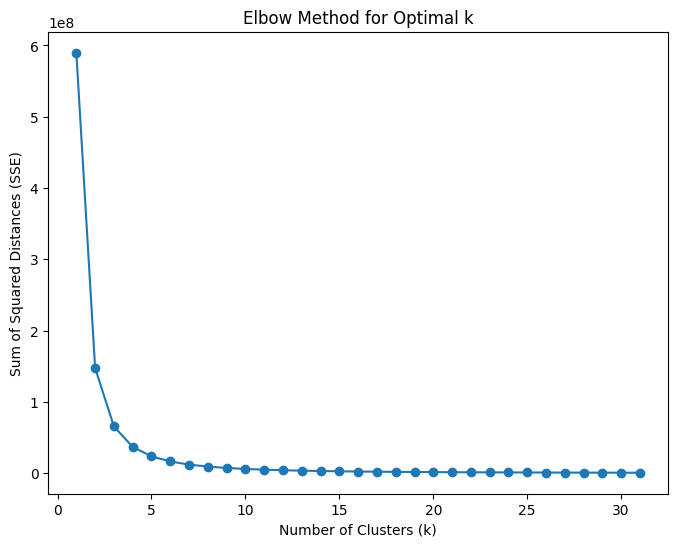

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min

# Define the range of k values
k_range = range(1, 32)
sse = []  # Sum of squared distances for each k

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Sum of squared distances to closest cluster center
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.show()


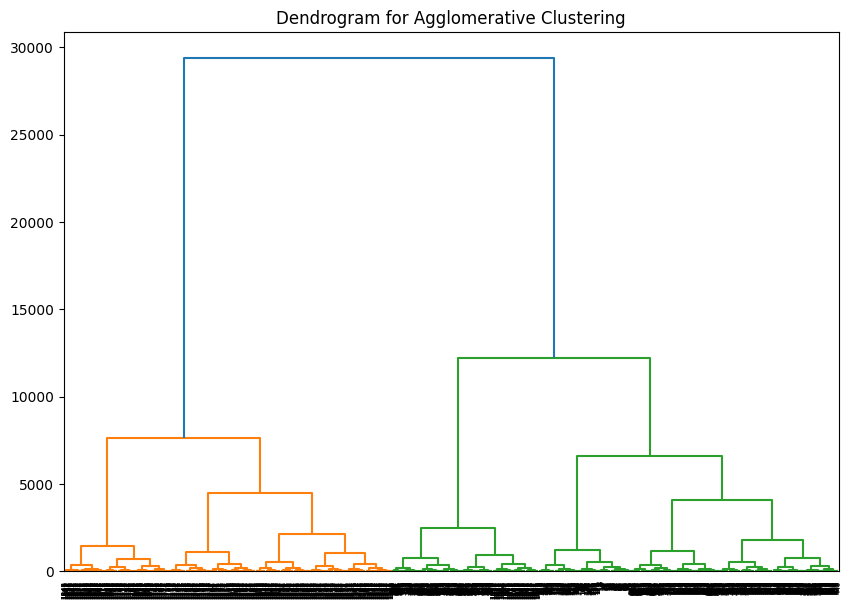

In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)

# Compute the linkage for dendrogram
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features and target
X = df.drop(columns=['DR', 'ARMD'])  # Features
y = df['DR']  # Target (using 'DR' as an example; adjust as needed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Apply Sequential Feature Selector (forward selection)
sfs_forward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='forward')
sfs_forward.fit(X_train, y_train)

# Get the selected features for forward selection
selected_features_forward = X.columns[sfs_forward.get_support()]
print("Selected Features (Forward Selection):", selected_features_forward)

# Apply Sequential Feature Selector (backward selection)
sfs_backward = SequentialFeatureSelector(log_reg, n_features_to_select='auto', direction='backward')
sfs_backward.fit(X_train, y_train)

# Get the selected features for backward selection
selected_features_backward = X.columns[sfs_backward.get_support()]
print("Selected Features (Backward Selection):", selected_features_backward)


Selected Features (Forward Selection): Index(['ID', 'Disease_Risk', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS',
       'MS', 'CSR', 'ODC', 'CRVO', 'AH', 'ODP', 'ODE', 'AION', 'PT', 'RS',
       'CRS', 'RPEC', 'MHL'],
      dtype='object')
Selected Features (Backward Selection): Index(['Disease_Risk', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS',
       'CSR', 'ODC', 'CRVO', 'AH', 'ODP', 'ODE', 'AION', 'PT', 'RS', 'CRS',
       'EDN', 'RPEC', 'MHL', 'RP'],
      dtype='object')


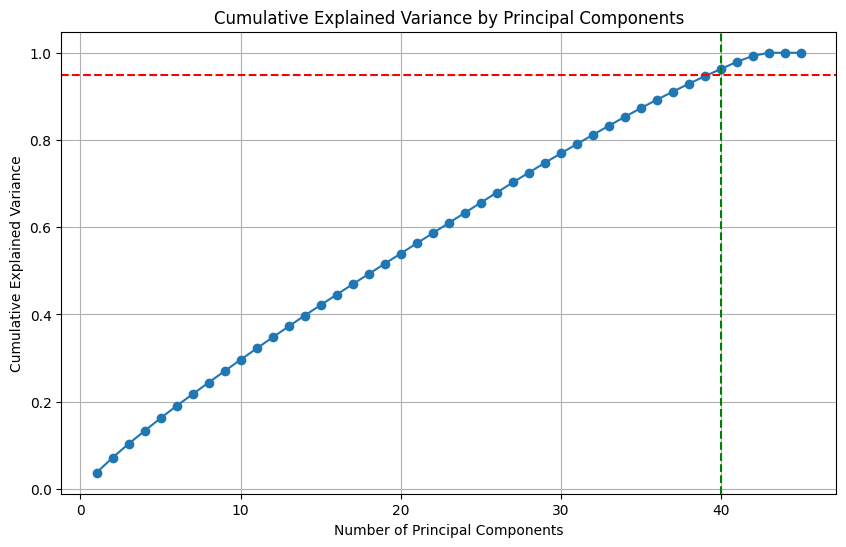

Number of components needed to capture 95% of the variance: 40


In [6]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features (drop class labels)
X = df.drop(columns=['DR', 'ARMD'])  # Adjust as necessary

# Standardize the features (optional but recommended for PCA)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line at 95%
plt.axvline(x=np.argmax(cumulative_variance >= 0.95) + 1, color='g', linestyle='--')  # Vertical line for K
plt.grid()
plt.show()

# Determine the number of components needed to capture 95% of the variance
K = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to capture 95% of the variance: {K}")


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('RFMiD_Training_Labels.csv')

# Prepare the features and target
X = df.drop(columns=['DR', 'ARMD'])  # Adjust as necessary
y = df['DR']  # Example target, you can choose 'ARMD' as needed

# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Determine the number of components needed to capture 95% of the variance
K = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"Number of components needed to capture 95% of the variance: {K}")

# Transform the data with the first K principal components
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X_scaled)

# Split the transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model on the PCA-transformed data
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model using the first {K} principal components: {accuracy:.2f}")


Number of components needed to capture 95% of the variance: 40
Accuracy of the Logistic Regression model using the first 40 principal components: 0.80
